# Linear Regression Assignment

## Problem Statement

## Objective

### Import required libraries

In [3467]:
# Numerical and Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

### Data Loading

In [3469]:
# Load the dataset and read the csv file
bike_df = pd.read_csv('day.csv')

In [3470]:
# Display first 5 rows to understand the structure of the dataset
bike_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

### Data Understanding

In [3472]:
# Check the basic info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [3473]:
# Check the columns
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [3474]:
#Determining the number of rows and columns
bike_df.shape

(730, 16)

In [3475]:
# Check numerical columns and summarize the values
bike_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

### Data cleanup

In [3477]:
# Check whether there are any duplicate rows
duplicate_rows=len(bike_df[bike_df.duplicated()])
duplicate_rows

0

There are no duplicate rows

In [3479]:
# Check for null values in the data set in descending order so we can check from the highest null values
bike_df.isna().sum().sort_values(ascending=False)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no missing values in dataset

In [3481]:
# Find unique values of a column
bike_df.nunique().sort_values()

yr              2
holiday         2
workingday      2
weathersit      3
season          4
weekday         7
mnth           12
temp          498
hum           594
casual        605
windspeed     649
registered    678
atemp         689
cnt           695
dteday        730
instant       730
dtype: int64

### Data Conversion and Formatting

In [3483]:
#Mapping variables 

bike_df['season']=bike_df.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bike_df['mnth']=bike_df.mnth.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})
bike_df['weathersit']=bike_df.weathersit.map({1: 'Clear',2:'Mist',3:'Light Rain',4:'Heavy Rain'})
bike_df['weekday']=bike_df.weekday.map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})
bike_df['yr']=bike_df.yr.map({0:2018,1:2019})
#bike_df['workingday']=bike_df.workingday.map({0:'No',1:'Yes'})
bike_df.head()

instant      dteday  season    yr     mnth  holiday    weekday  workingday  \
0        1  01-01-2018  spring  2018  January        0   Saturday           0   
1        2  02-01-2018  spring  2018  January        0     Sunday           0   
2        3  03-01-2018  spring  2018  January        0     Monday           1   
3        4  04-01-2018  spring  2018  January        0    Tuesday           1   
4        5  05-01-2018  spring  2018  January        0  Wednesday           1   

  weathersit       temp     atemp      hum  windspeed  casual  registered  \
0       Mist  14.110847  18.18125  80.5833  10.749882     331         654   
1       Mist  14.902598  17.68695  69.6087  16.652113     131         670   
2      Clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3      Clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4      Clear   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

### Data Visualization

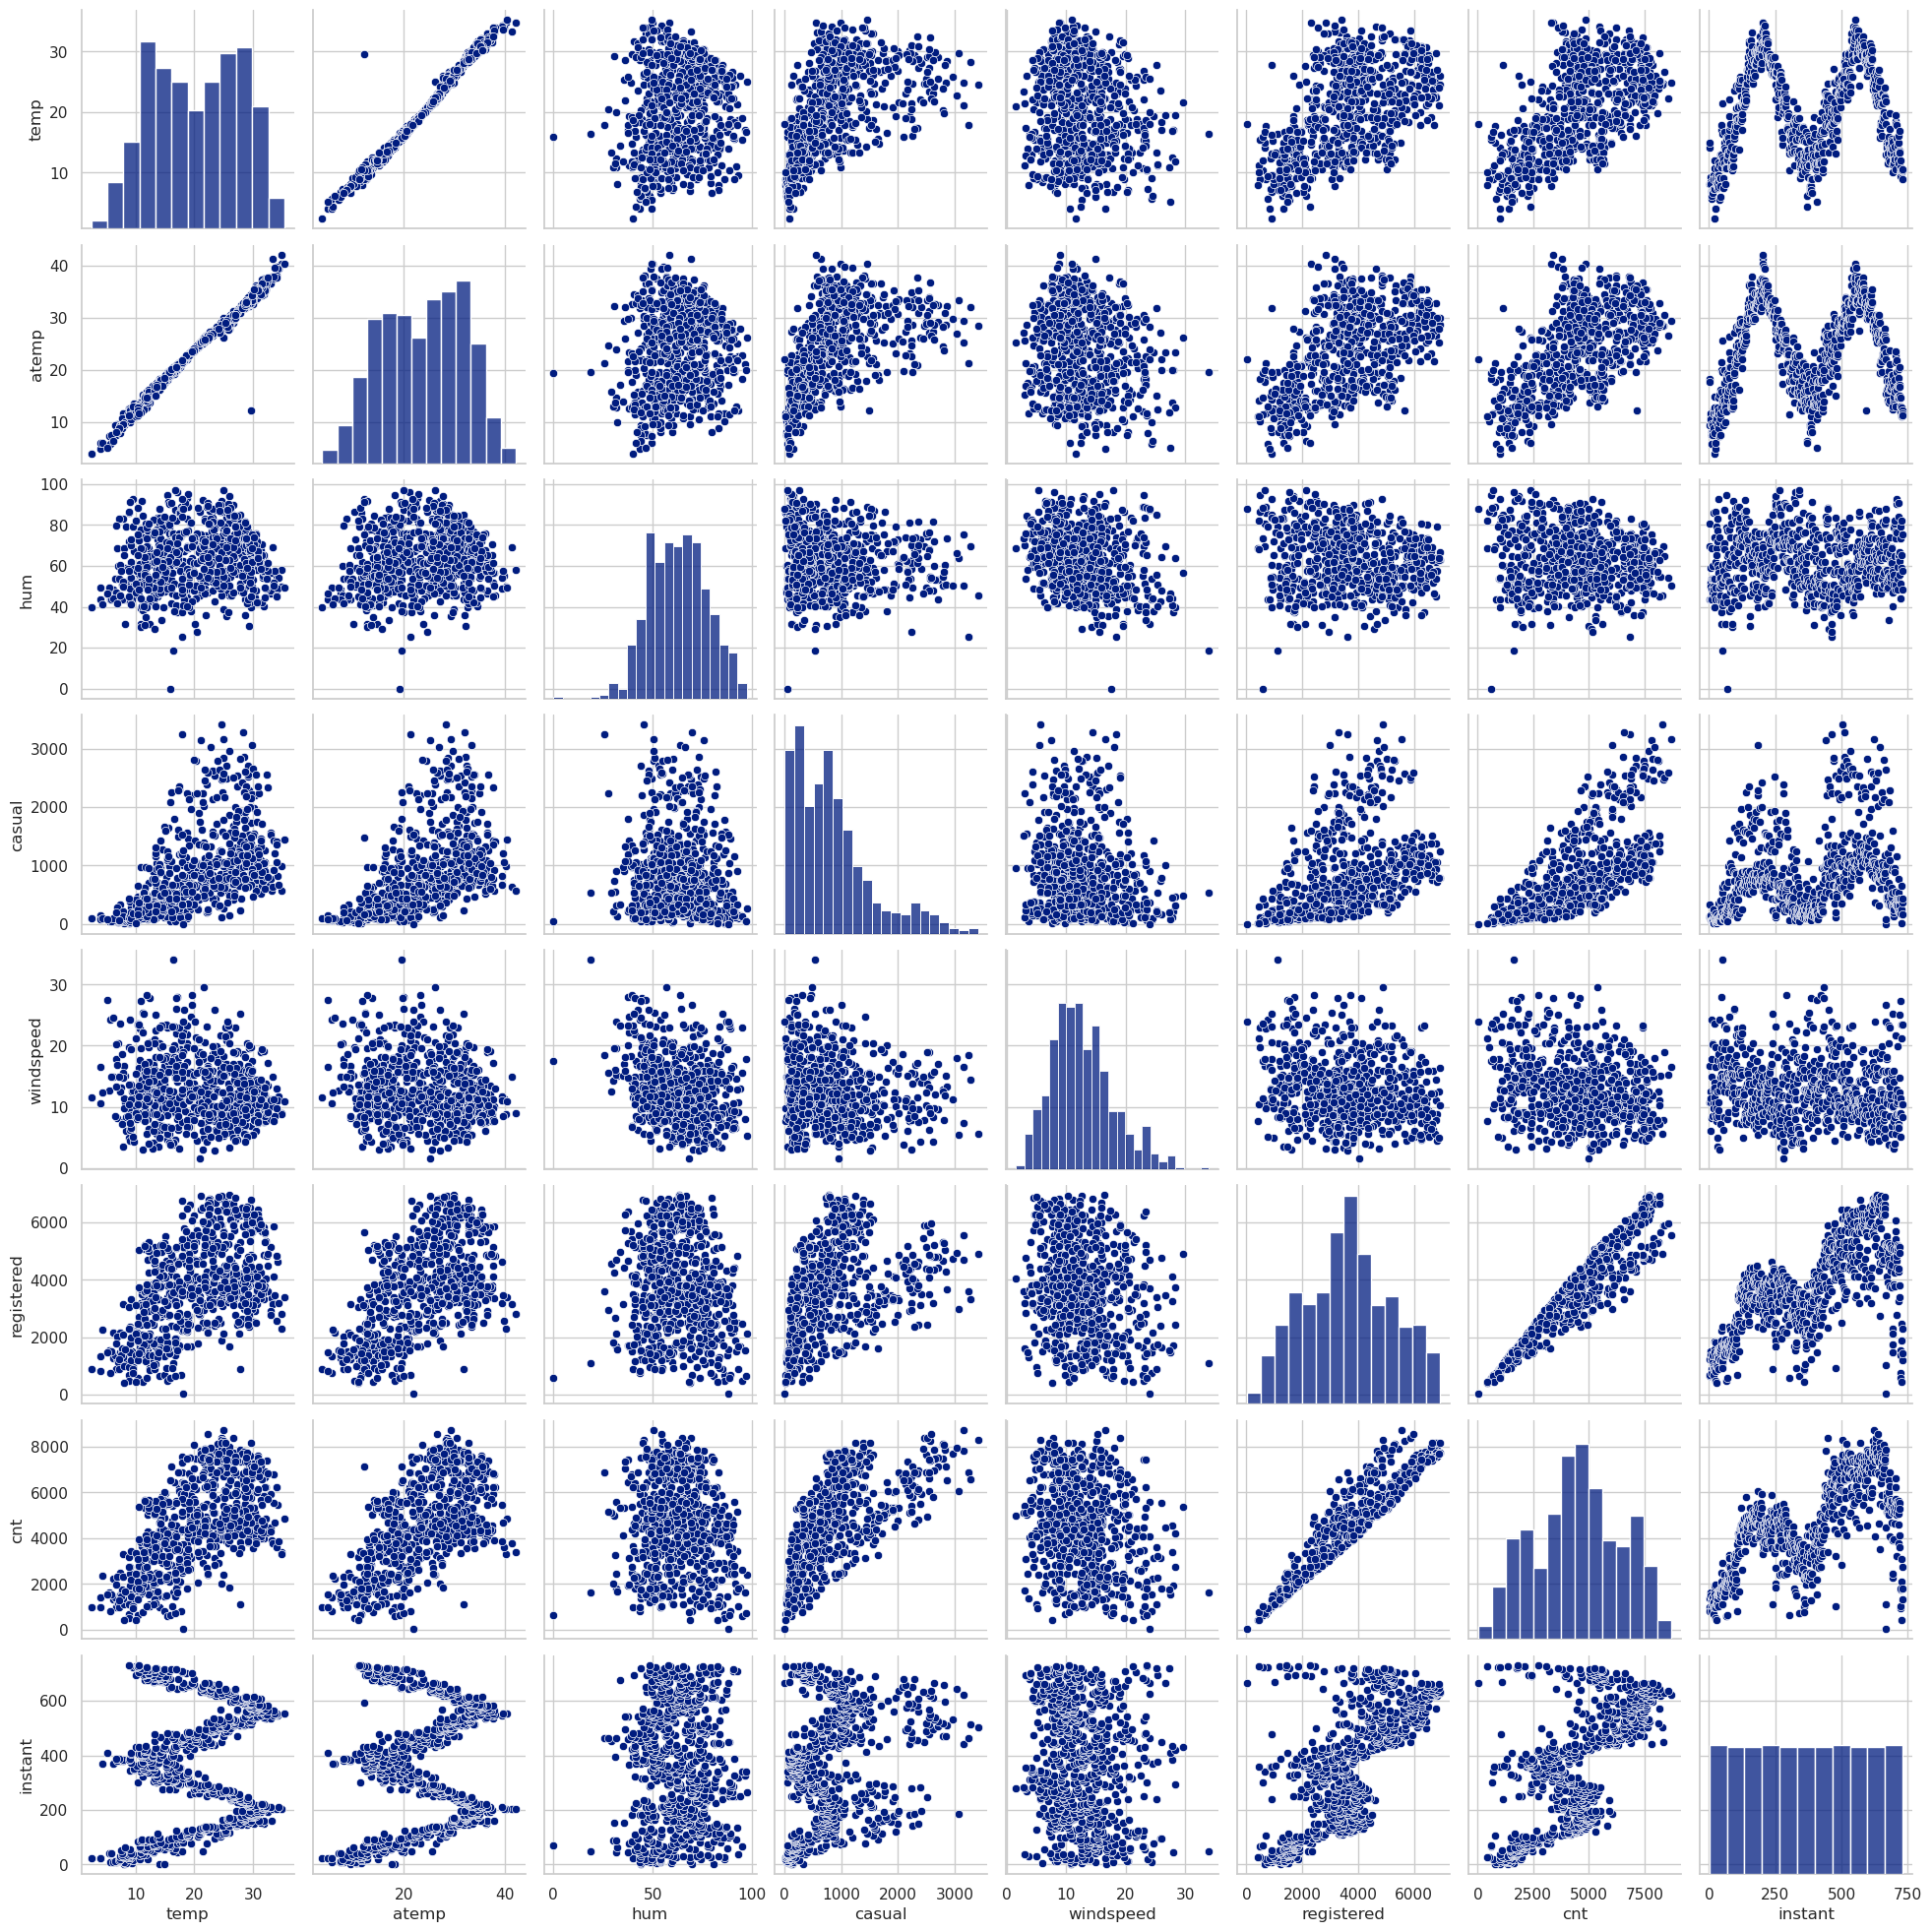

In [3485]:
# Visualize the plot for numeric variables
sns.pairplot(bike_df, vars=['temp','atemp','hum','casual','windspeed','registered','cnt','instant'])
plt.show()

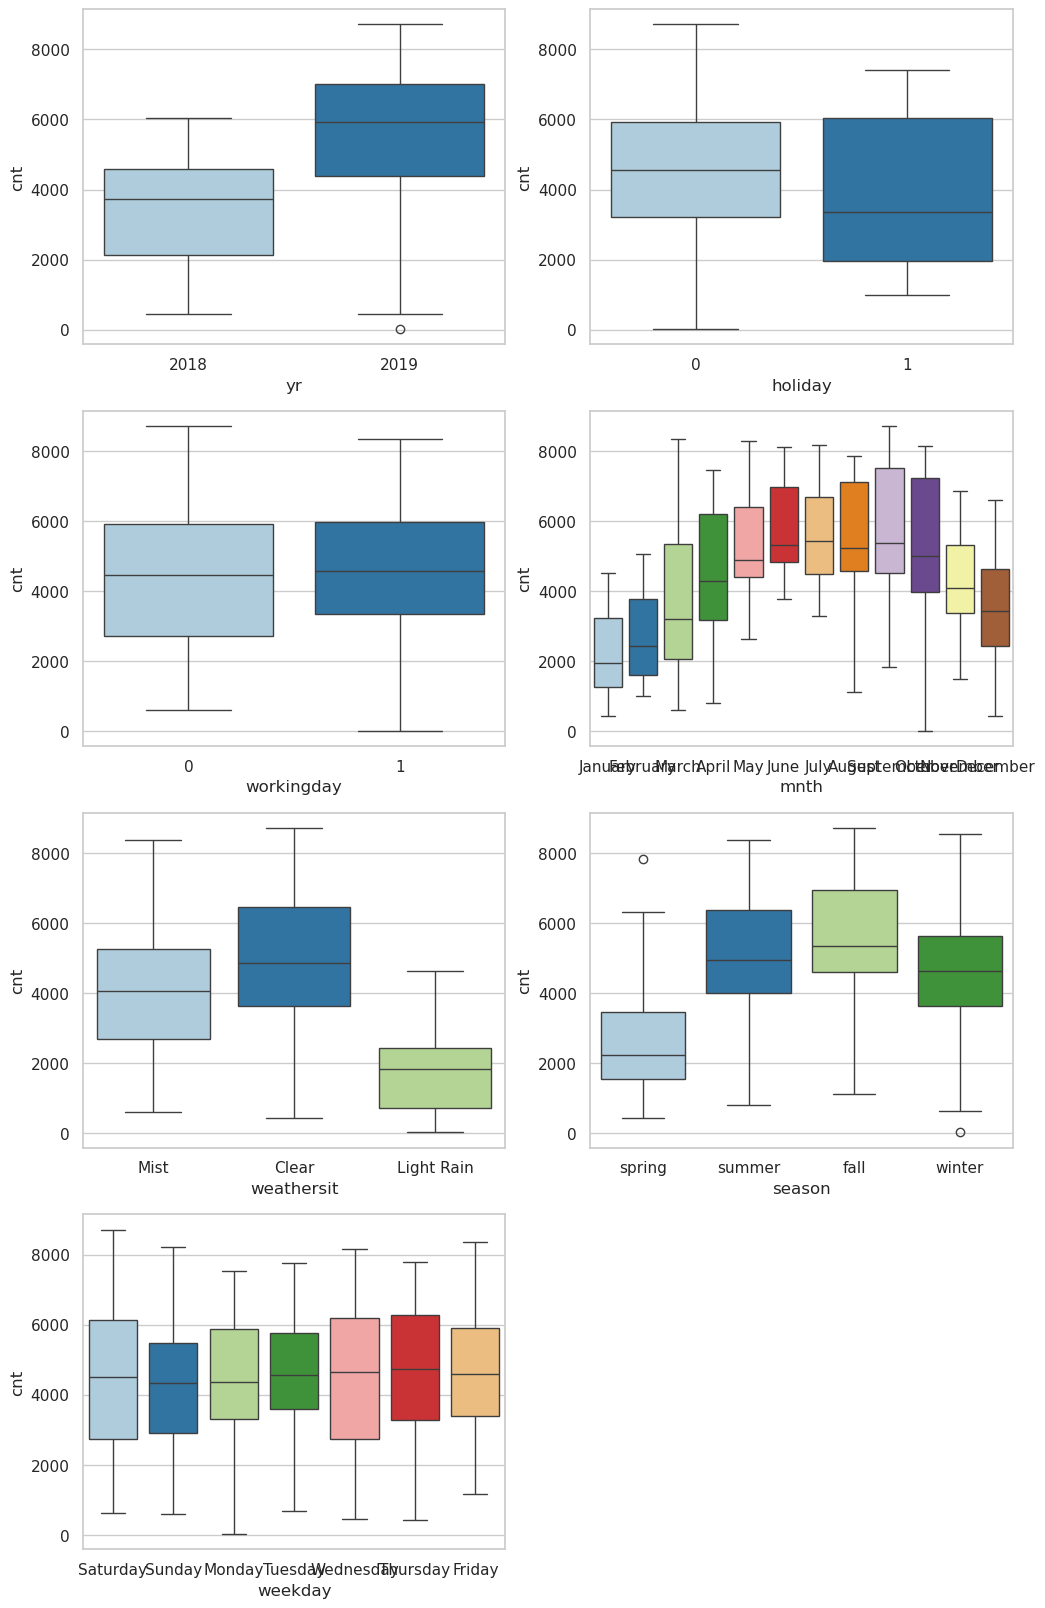

In [3486]:
# Relationship between categorical and continuous variable
plt.figure(figsize=(12, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_df, palette='Paired')
plt.subplot(4,2,2)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_df, palette='Paired')
plt.subplot(4,2,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_df, palette='Paired')
plt.subplot(4,2,4)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_df, palette='Paired')
plt.subplot(4,2,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_df, palette='Paired')
plt.subplot(4,2,6)
sns.boxplot(x = 'season', y = 'cnt', data = bike_df, palette='Paired')
plt.subplot(4,2,7)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_df, palette='Paired')
plt.show()

In [3487]:
# Visualize Categorical variables

# Create Function definition for bar plot

def plot_bar_graph(dataframe, x_column, y_column=None, hue_column=None, title=None, xlabel=None, ylabel=None, figsize=(10, 6), x_tick_rotation=90, freq_rotation=0, filter_column=None, filter_value=None, palette_column='rocket'):
        
    # Apply the filter if filter_column and filter_value are provided
    if filter_column and filter_value is not None:
        filtered_dataframe = dataframe[dataframe[filter_column] == filter_value]
    else:
        filtered_dataframe = dataframe

    # Set the style
    sns.set(style="whitegrid")

    # Create the bar plot
    plt.figure(figsize=figsize)
    
    if y_column:
        y_data = filtered_dataframe[y_column].value_counts()
        x_data = y_data.index
        sns.barplot(x=x_data, y=y_data.values, hue=hue_column,palette=palette_column)
    else:
        sns.barplot(data=filtered_dataframe, x=x_column, hue=hue_column,palette=palette_column)

    # Display frequency on top of the bars with rotation
    if y_column:
        for p in plt.gca().patches:
            plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', rotation=freq_rotation)

    # Set title and labels
    if title:
        plt.title(title, fontsize=14)
    if xlabel:
        plt.xlabel(xlabel, fontsize=12)
    if ylabel:
        plt.ylabel(ylabel, fontsize=12)

    # Rotate x-axis labels
    plt.xticks(rotation=x_tick_rotation)

    # Show the plot
    plt.show()

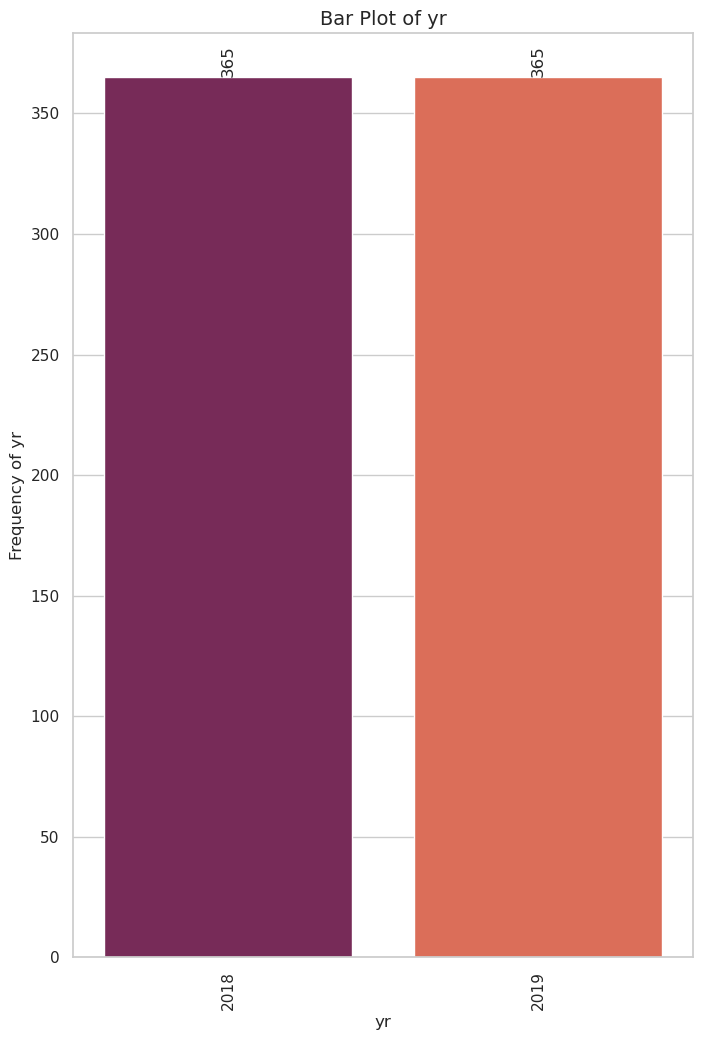

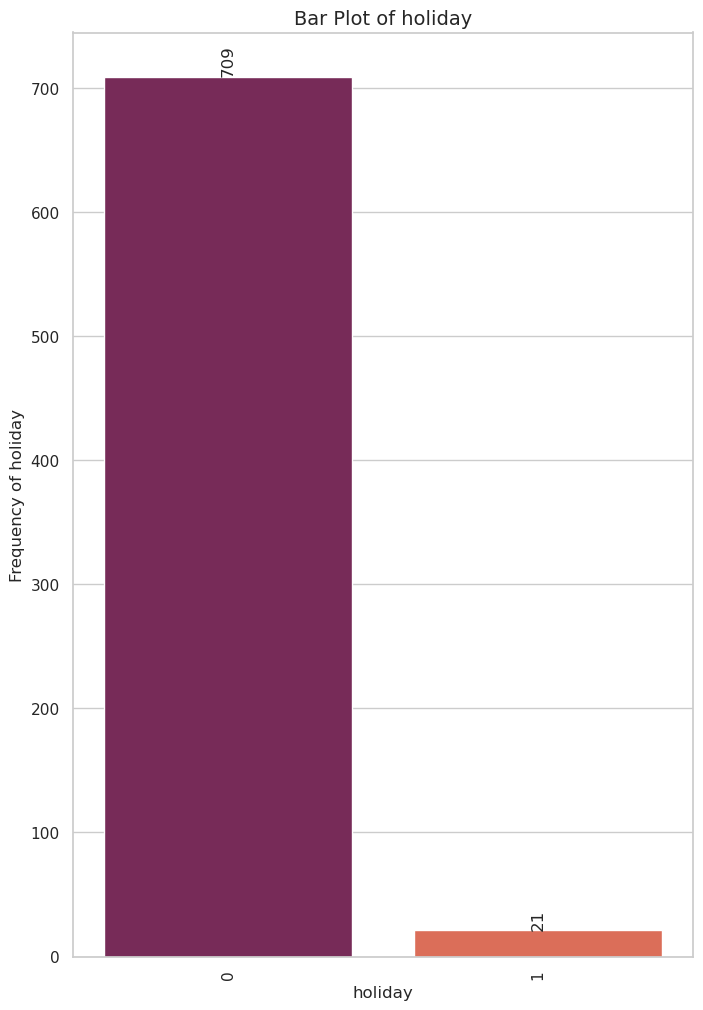

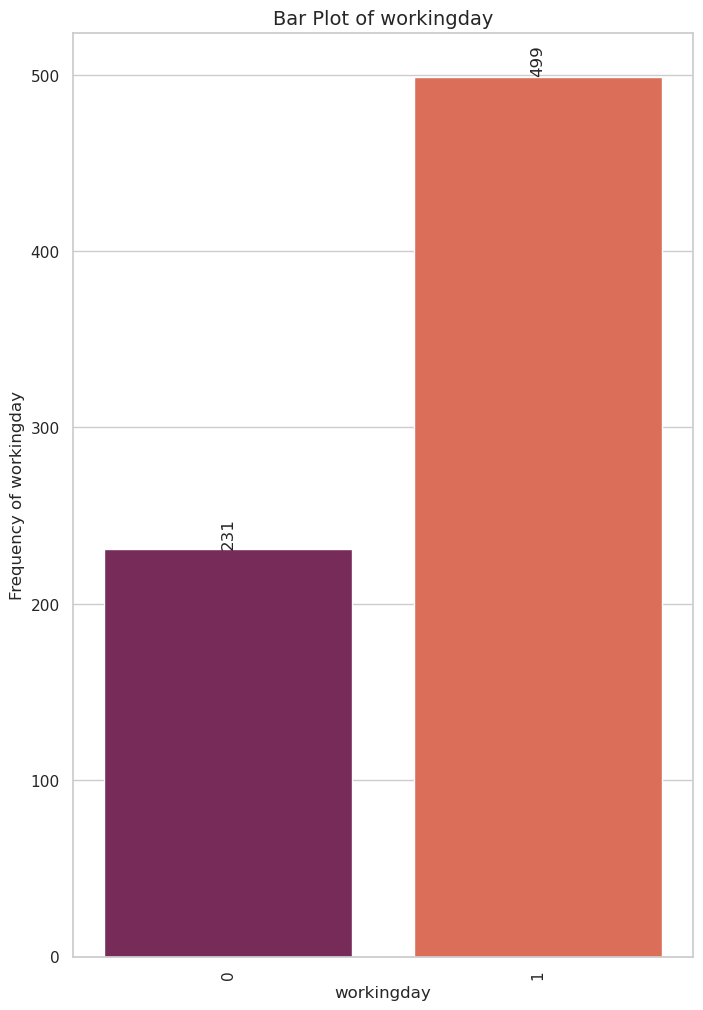

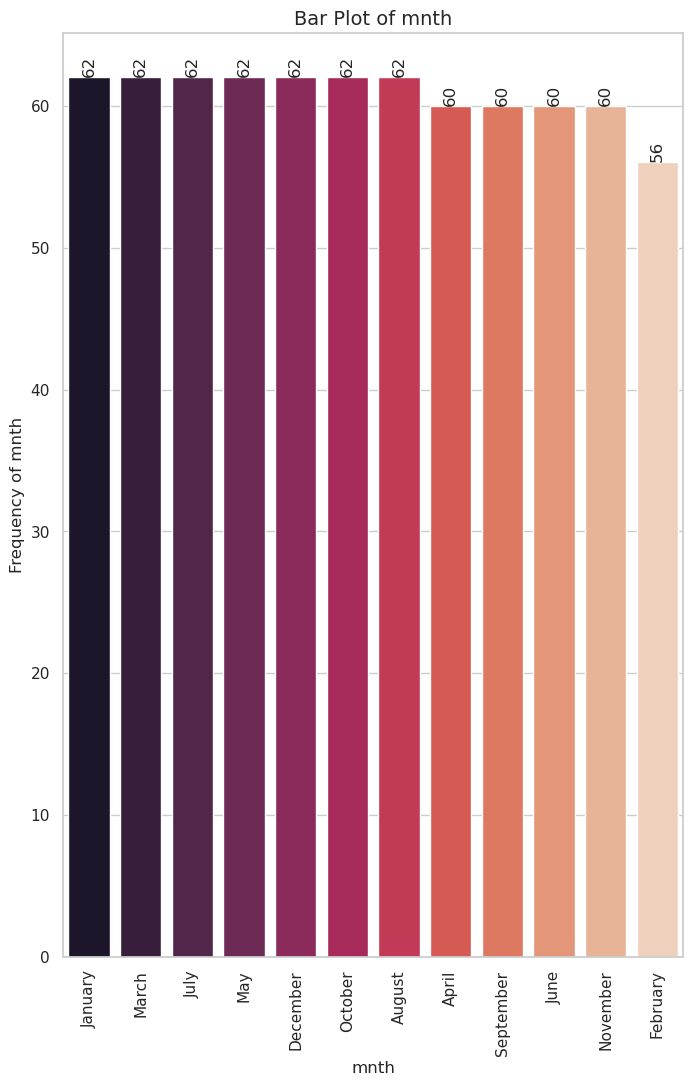

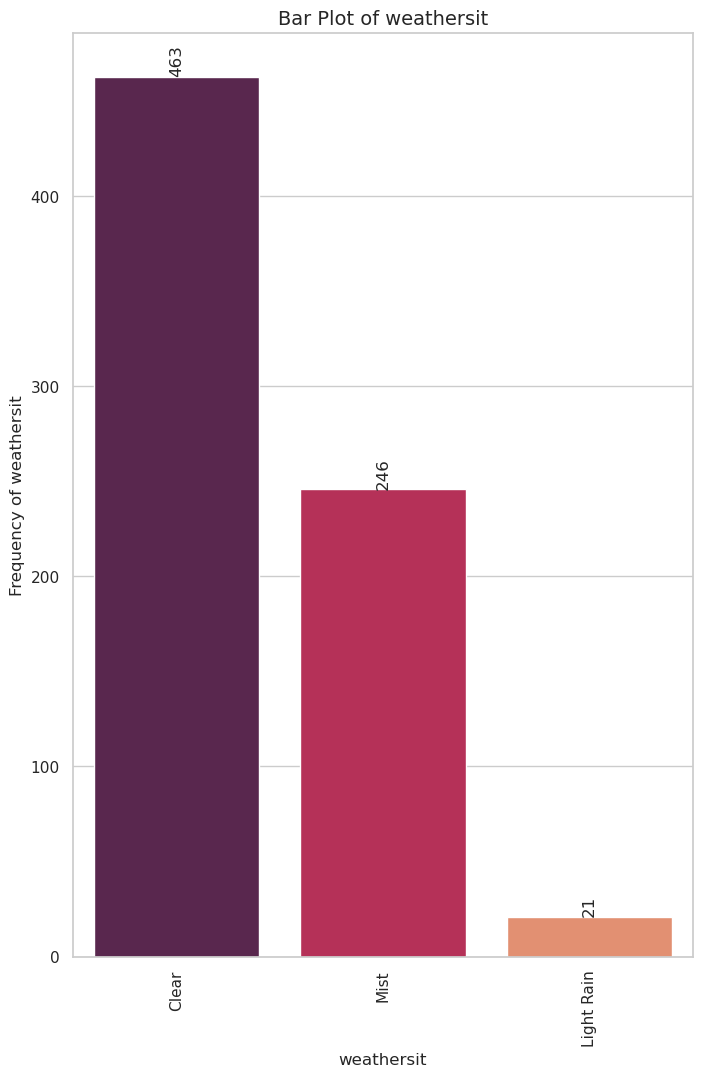

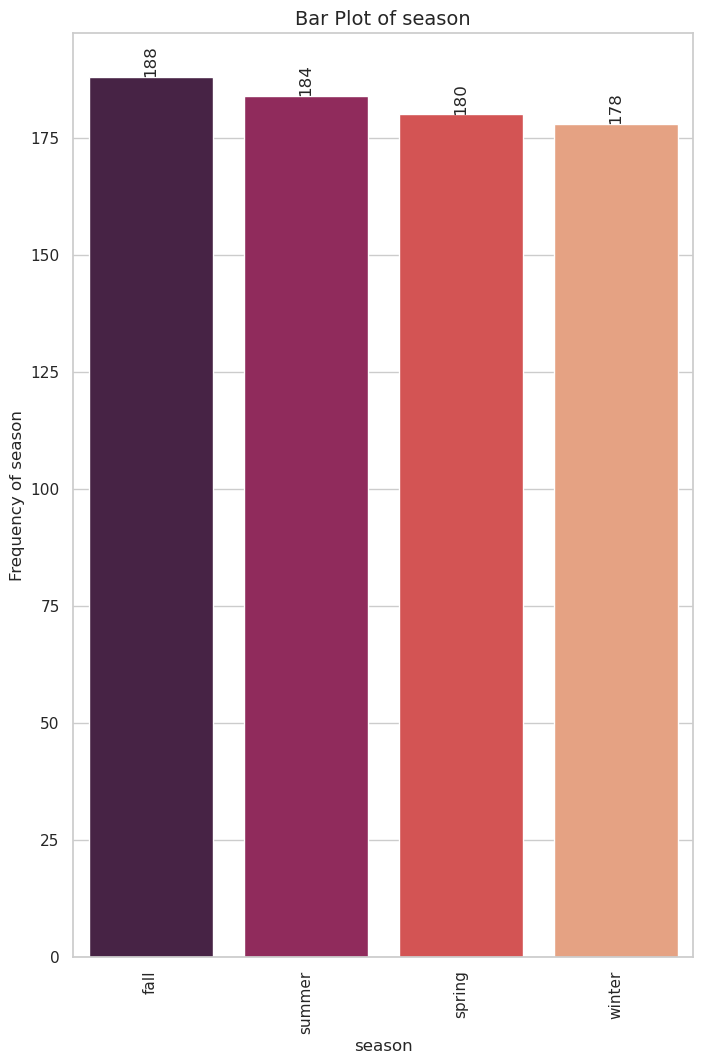

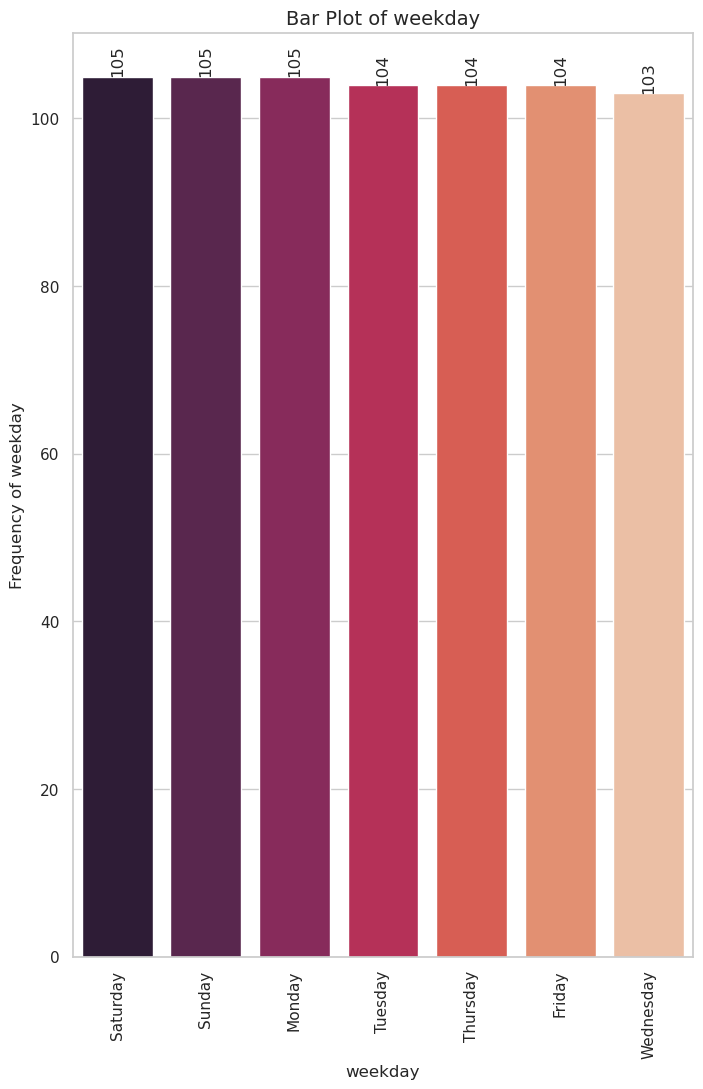

In [3488]:
for cat_var in ['yr','holiday','workingday','mnth','weathersit','season','weekday']:
    plot_bar_graph(
        bike_df,
        x_column = cat_var,
        y_column = cat_var,
        title = f'Bar Plot of {cat_var}',
        xlabel = cat_var,
        ylabel=f'Frequency of {cat_var}',
        figsize=(8, 12),
        x_tick_rotation=90,
        freq_rotation=90,
        filter_column='cnt'
    )

In [3489]:
# summary statistics of numerical variables
bike_df[['temp','atemp','hum','windspeed']].describe()

temp       atemp         hum   windspeed
count  730.000000  730.000000  730.000000  730.000000
mean    20.319259   23.726322   62.765175   12.763620
std      7.506729    8.150308   14.237589    5.195841
min      2.424346    3.953480    0.000000    1.500244
25%     13.811885   16.889713   52.000000    9.041650
50%     20.465826   24.368225   62.625000   12.125325
75%     26.880615   30.445775   72.989575   15.625589
max     35.328347   42.044800   97.250000   34.000021

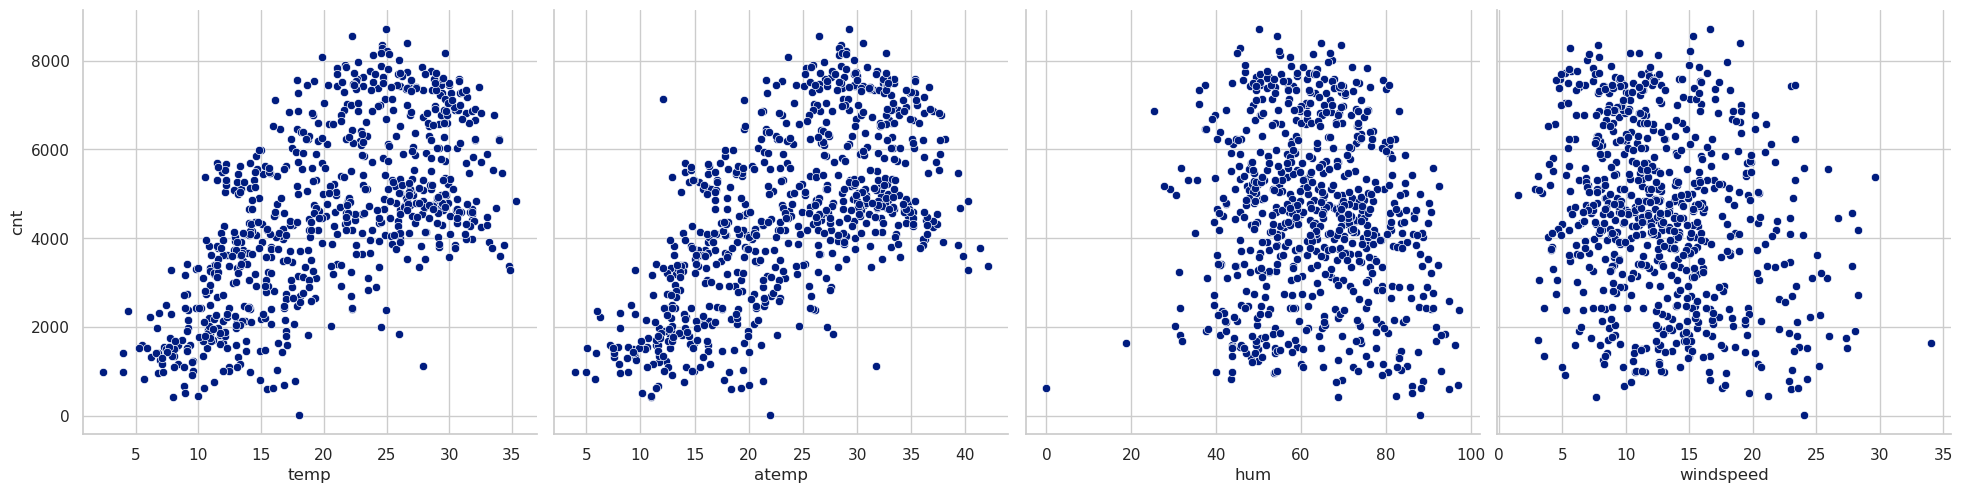

In [3490]:
# Scatter Plots of Continuous variables vs 'cnt'
sns.set_style('whitegrid')
sns.set_palette('dark')
sns.pairplot(data=bike_df,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt',kind='scatter',height=5,aspect=1);

In [3491]:
# Drop unnecessary columns
bike_df=bike_df.drop(['instant','dteday','casual', 'registered','atemp'], axis=1)
bike_df.head()

season    yr     mnth  holiday    weekday  workingday weathersit  \
0  spring  2018  January        0   Saturday           0       Mist   
1  spring  2018  January        0     Sunday           0       Mist   
2  spring  2018  January        0     Monday           1      Clear   
3  spring  2018  January        0    Tuesday           1      Clear   
4  spring  2018  January        0  Wednesday           1      Clear   

        temp      hum  windspeed   cnt  
0  14.110847  80.5833  10.749882   985  
1  14.902598  69.6087  16.652113   801  
2   8.050924  43.7273  16.636703  1349  
3   8.200000  59.0435  10.739832  1562  
4   9.305237  43.6957  12.522300  1600

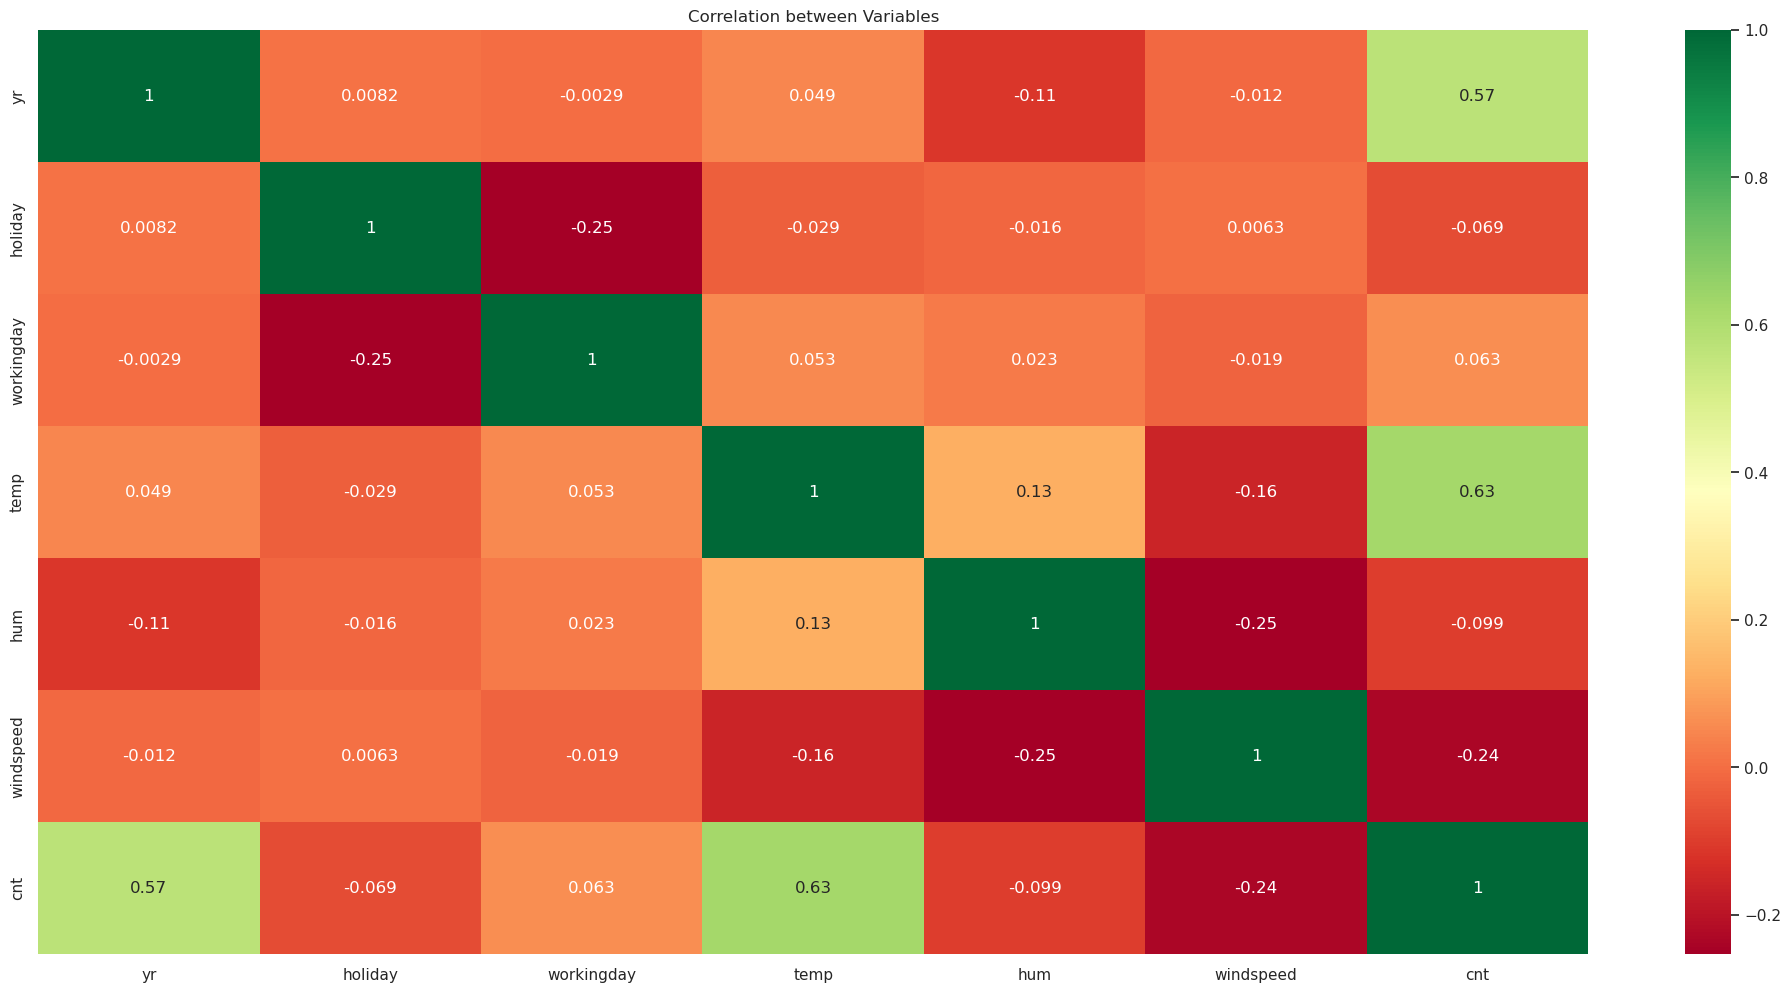

In [3492]:
# Remove non-numeric columns
bike_df_numeric = bike_df.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(25, 12))
sns.heatmap(bike_df_numeric.corr(), cmap='RdYlGn', annot=True)
plt.title("Correlation between Variables")
plt.show()

#### Drop columns

In [3494]:
# Check datatypes 
bike_df.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

### Data Preparation

#### Dummy variables

In [3497]:
# creating indicator variable columns
months=pd.get_dummies(bike_df.mnth,drop_first=True)
weekdays=pd.get_dummies(bike_df.weekday,drop_first=True)
weather_sit=pd.get_dummies(bike_df.weathersit,drop_first=True)
seasons=pd.get_dummies(bike_df.season,drop_first=True)

In [3498]:
# adding indicator variable columns to the dataset. Dropping original columns
bike_df=pd.concat([months,weekdays,weather_sit,seasons,bike_df],axis=1)
bike_df.head()

August  December  February  January   July   June  March    May  November  \
0   False     False     False     True  False  False  False  False     False   
1   False     False     False     True  False  False  False  False     False   
2   False     False     False     True  False  False  False  False     False   
3   False     False     False     True  False  False  False  False     False   
4   False     False     False     True  False  False  False  False     False   

   October  ...    yr     mnth  holiday    weekday  workingday  weathersit  \
0    False  ...  2018  January        0   Saturday           0        Mist   
1    False  ...  2018  January        0     Sunday           0        Mist   
2    False  ...  2018  January        0     Monday           1       Clear   
3    False  ...  2018  January        0    Tuesday           1       Clear   
4    False  ...  2018  January        0  Wednesday           1       Clear   

        temp      hum  windspeed   cnt  
0  14.110847  80.5833  10.749882   985  
1  14.902598  69.6087  16.652113   801  
2   8.050924  43.7273  16.636703  1349  
3   8.200000  59.0435  10.739832  1562  
4   9.305237  43.6957  12.522300  1600  

[5 rows x 33 columns]

In [3499]:
# Drop 'season','month','weekday','weathersit' as we have created the dummies for it
bike_df.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
bike_df.head()

August  December  February  January   July   June  March    May  November  \
0   False     False     False     True  False  False  False  False     False   
1   False     False     False     True  False  False  False  False     False   
2   False     False     False     True  False  False  False  False     False   
3   False     False     False     True  False  False  False  False     False   
4   False     False     False     True  False  False  False  False     False   

   October  ...  spring  summer  winter    yr  holiday  workingday       temp  \
0    False  ...    True   False   False  2018        0           0  14.110847   
1    False  ...    True   False   False  2018        0           0  14.902598   
2    False  ...    True   False   False  2018        0           1   8.050924   
3    False  ...    True   False   False  2018        0           1   8.200000   
4    False  ...    True   False   False  2018        0           1   9.305237   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600  

[5 rows x 29 columns]

In [3500]:
#Number of rows and columns
bike_df.shape

(730, 29)

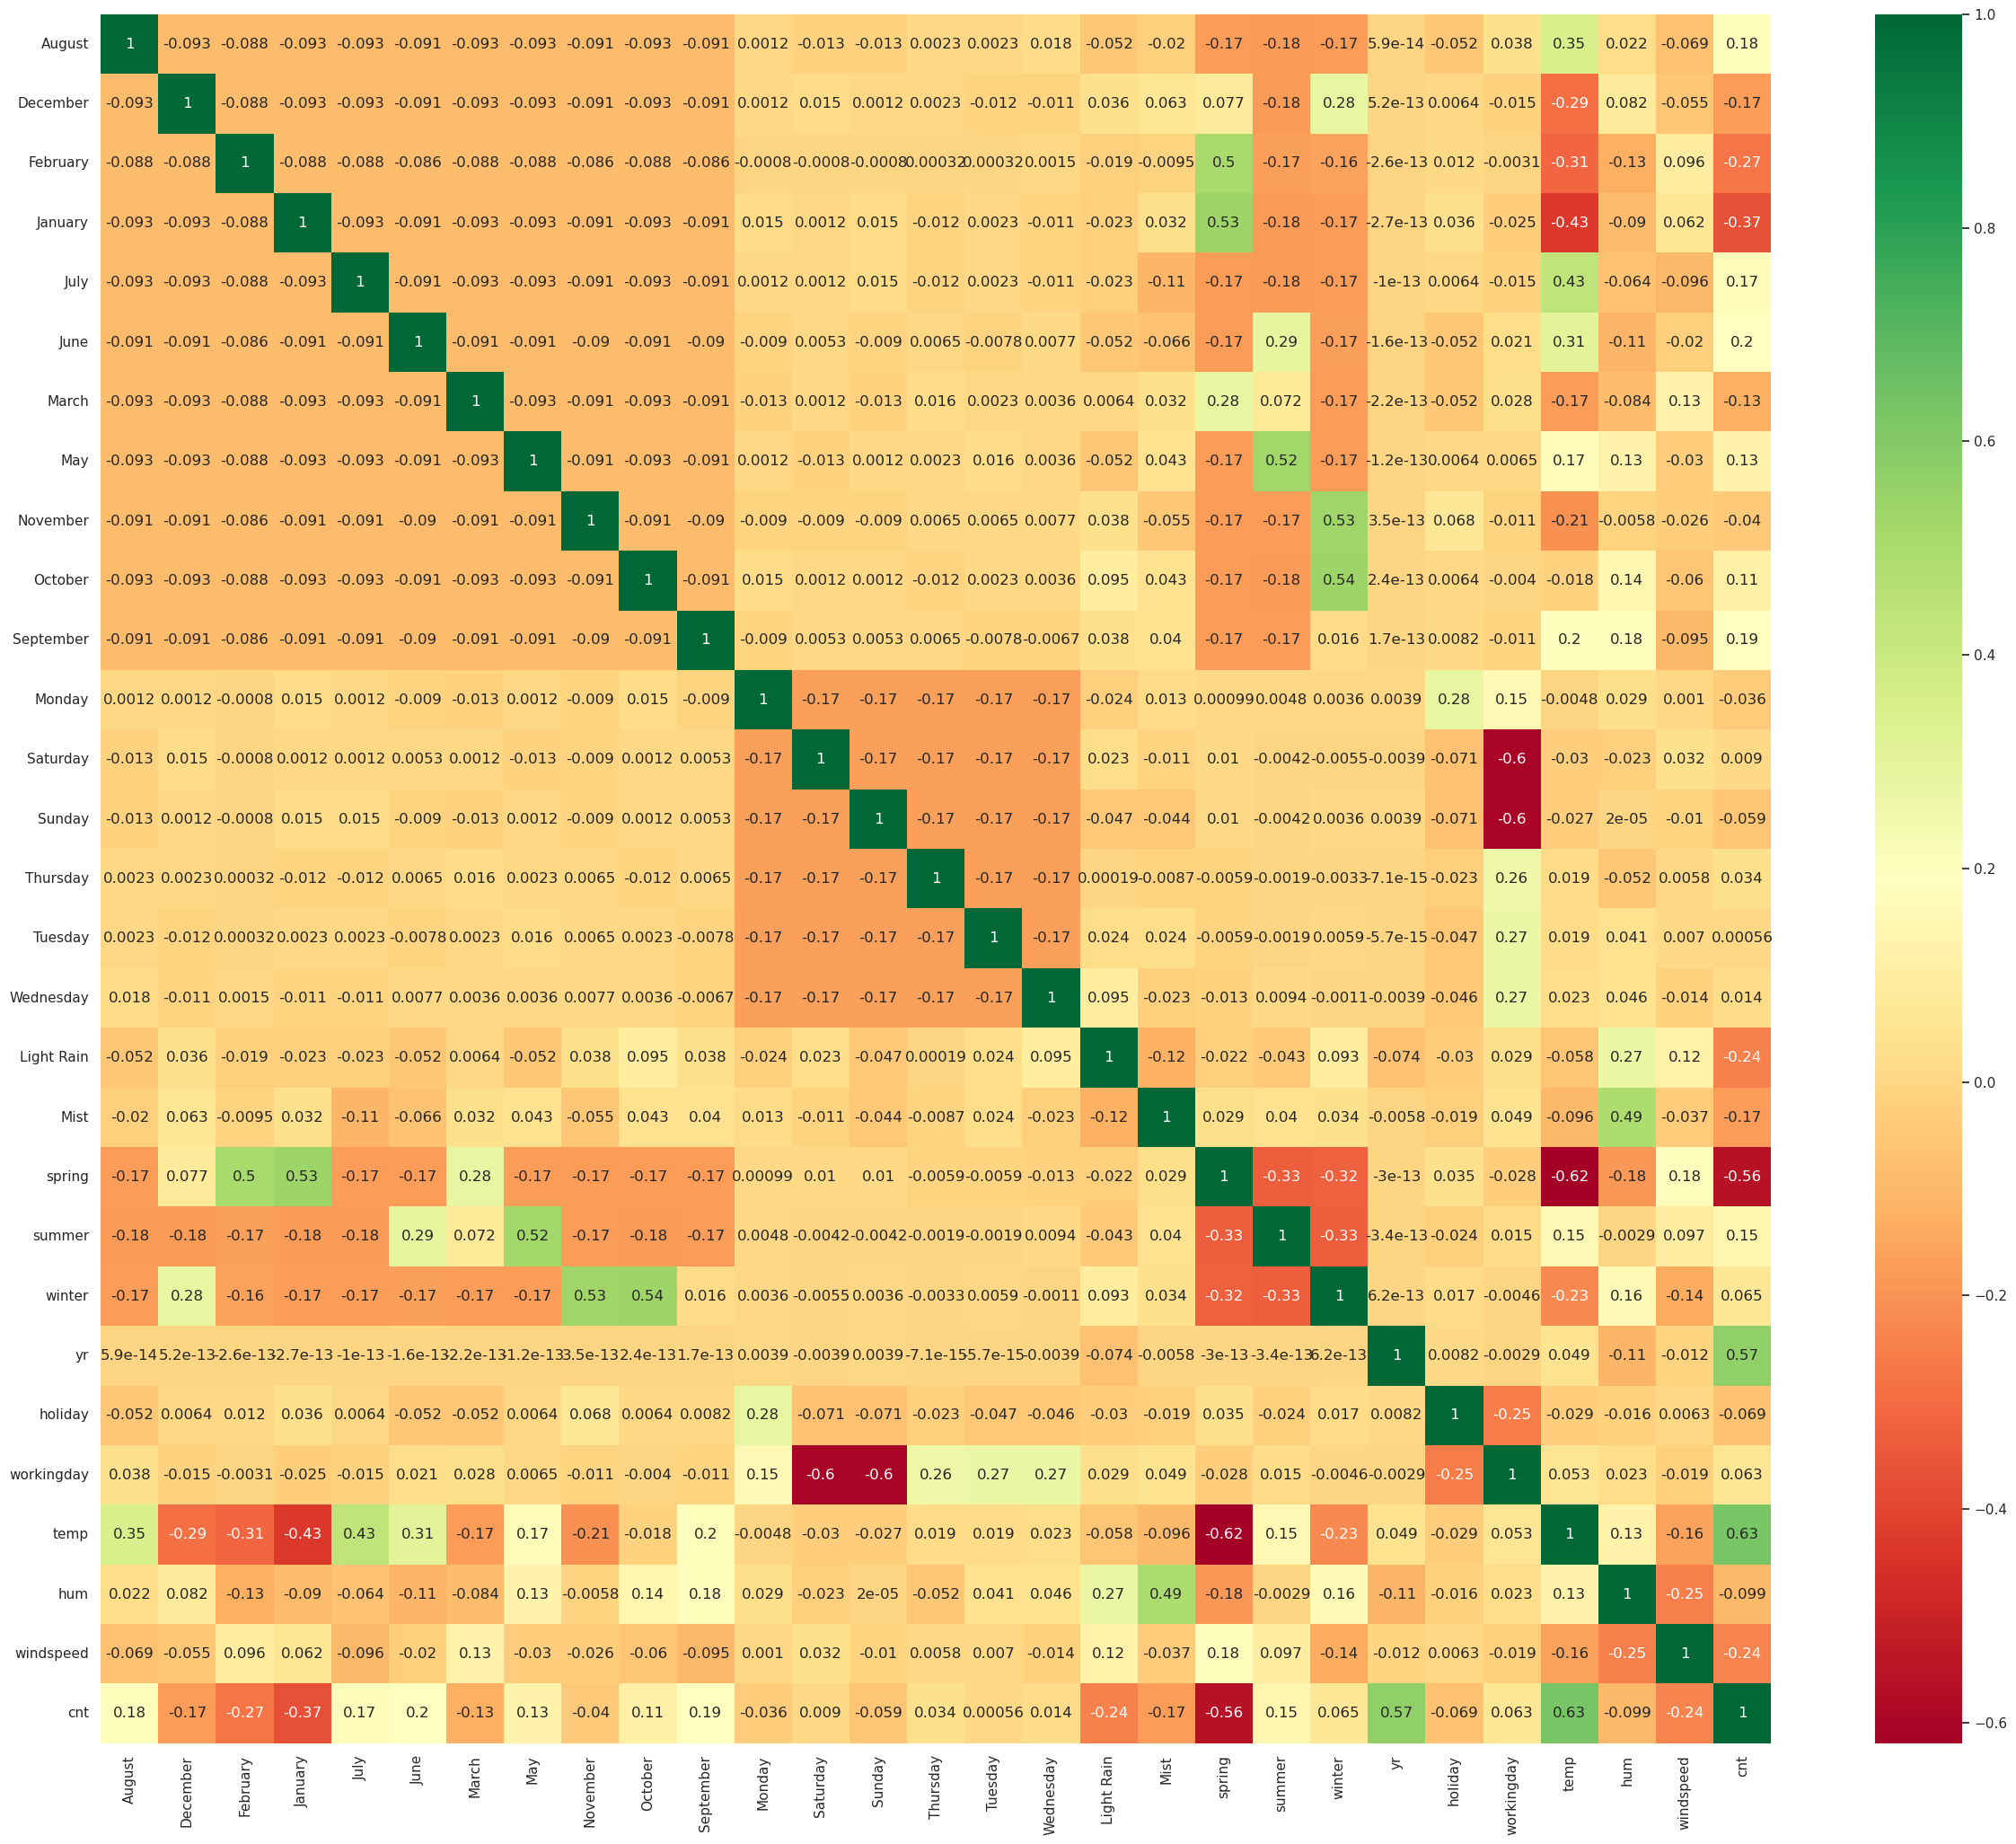

In [3501]:
#Heatmap to see correlation between variables
plt.figure(figsize=(30, 25))
sns.heatmap(bike_df.corr(), cmap='RdYlGn', annot = True)
plt.show()

### Splitting the Data into Training and Testing Sets

In [3503]:
# Import necessary library

from sklearn.model_selection import train_test_split

In [3504]:
# Specify the train and test data set always so they can have the same rows

bike_train, bike_test = train_test_split(bike_df, train_size = 0.7, random_state = 100)

In [3505]:
#Rows and columns after split
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(220, 29)


In [3506]:
# Check the dtypes
print(bike_train.dtypes)

August           bool
December         bool
February         bool
January          bool
July             bool
June             bool
March            bool
May              bool
November         bool
October          bool
September        bool
Monday           bool
Saturday         bool
Sunday           bool
Thursday         bool
Tuesday          bool
Wednesday        bool
Light Rain       bool
Mist             bool
spring           bool
summer           bool
winter           bool
yr              int64
holiday         int64
workingday      int64
temp          float64
hum           float64
windspeed     float64
cnt             int64
dtype: object


In [3507]:
# Convert the dtypes bool to numeric
bike_train = bike_train.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)

#### Min-Max scaling

In [3509]:
# Import necessary library

from sklearn.preprocessing import MinMaxScaler

In [3510]:
scaler = MinMaxScaler()

#Create numeric variables list
num=['temp','hum','windspeed','cnt']

#Fit on data
bike_train[num] = scaler.fit_transform(bike_train[num])
bike_train.head()

August  December  February  January  July  June  March  May  November  \
576       0         0         0        0     1     0      0    0         0   
426       0         0         0        0     0     0      1    0         0   
728       0         1         0        0     0     0      0    0         0   
482       0         0         0        0     0     0      0    0         0   
111       0         0         0        0     0     0      0    0         0   

     October  ...  spring  summer  winter    yr  holiday  workingday  \
576        0  ...       0       0       0  2019        0           1   
426        0  ...       1       0       0  2019        0           0   
728        0  ...       1       0       0  2019        0           0   
482        0  ...       0       1       0  2019        0           0   
111        0  ...       0       1       0  2018        0           1   

         temp       hum  windspeed       cnt  
576  0.815169  0.725633   0.264686  0.827658  
426  0.442393  0.640189   0.255342  0.465255  
728  0.245101  0.498067   0.663106  0.204096  
482  0.395666  0.504508   0.188475  0.482973  
111  0.345824  0.751824   0.380981  0.191095  

[5 rows x 29 columns]

In [3511]:
#Check min and max after scaling
bike_train.describe()

August    December    February     January        July        June  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.096078    0.084314    0.066667    0.088235    0.076471    0.076471   
std      0.294988    0.278131    0.249689    0.283915    0.266010    0.266010   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

            March         May    November     October  ...      spring  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.098039    0.084314    0.086275    0.084314  ...    0.243137   
std      0.297660    0.278131    0.281045    0.278131  ...    0.429398   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

           summer      winter           yr     holiday  workingday  \
count  510.000000  510.000000   510.000000  510.000000  510.000000   
mean     0.247059    0.247059  2018.507843    0.025490    0.676471   
std      0.431725    0.431725     0.500429    0.157763    0.468282   
min      0.000000    0.000000  2018.000000    0.000000    0.000000   
25%      0.000000    0.000000  2018.000000    0.000000    0.000000   
50%      0.000000    0.000000  2019.000000    0.000000    1.000000   
75%      0.000000    0.000000  2019.000000    0.000000    1.000000   
max      1.000000    1.000000  2019.000000    1.000000    1.000000   

             temp         hum   windspeed         cnt  
count  510.000000  510.000000  510.000000  510.000000  
mean     0.537440    0.650480    0.320883    0.513499  
std      0.225858    0.145846    0.169803    0.224421  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.339853    0.538643    0.199179    0.356420  
50%      0.542596    0.653714    0.296763    0.518638  
75%      0.735215    0.754830    0.414447    0.684710  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 29 columns]

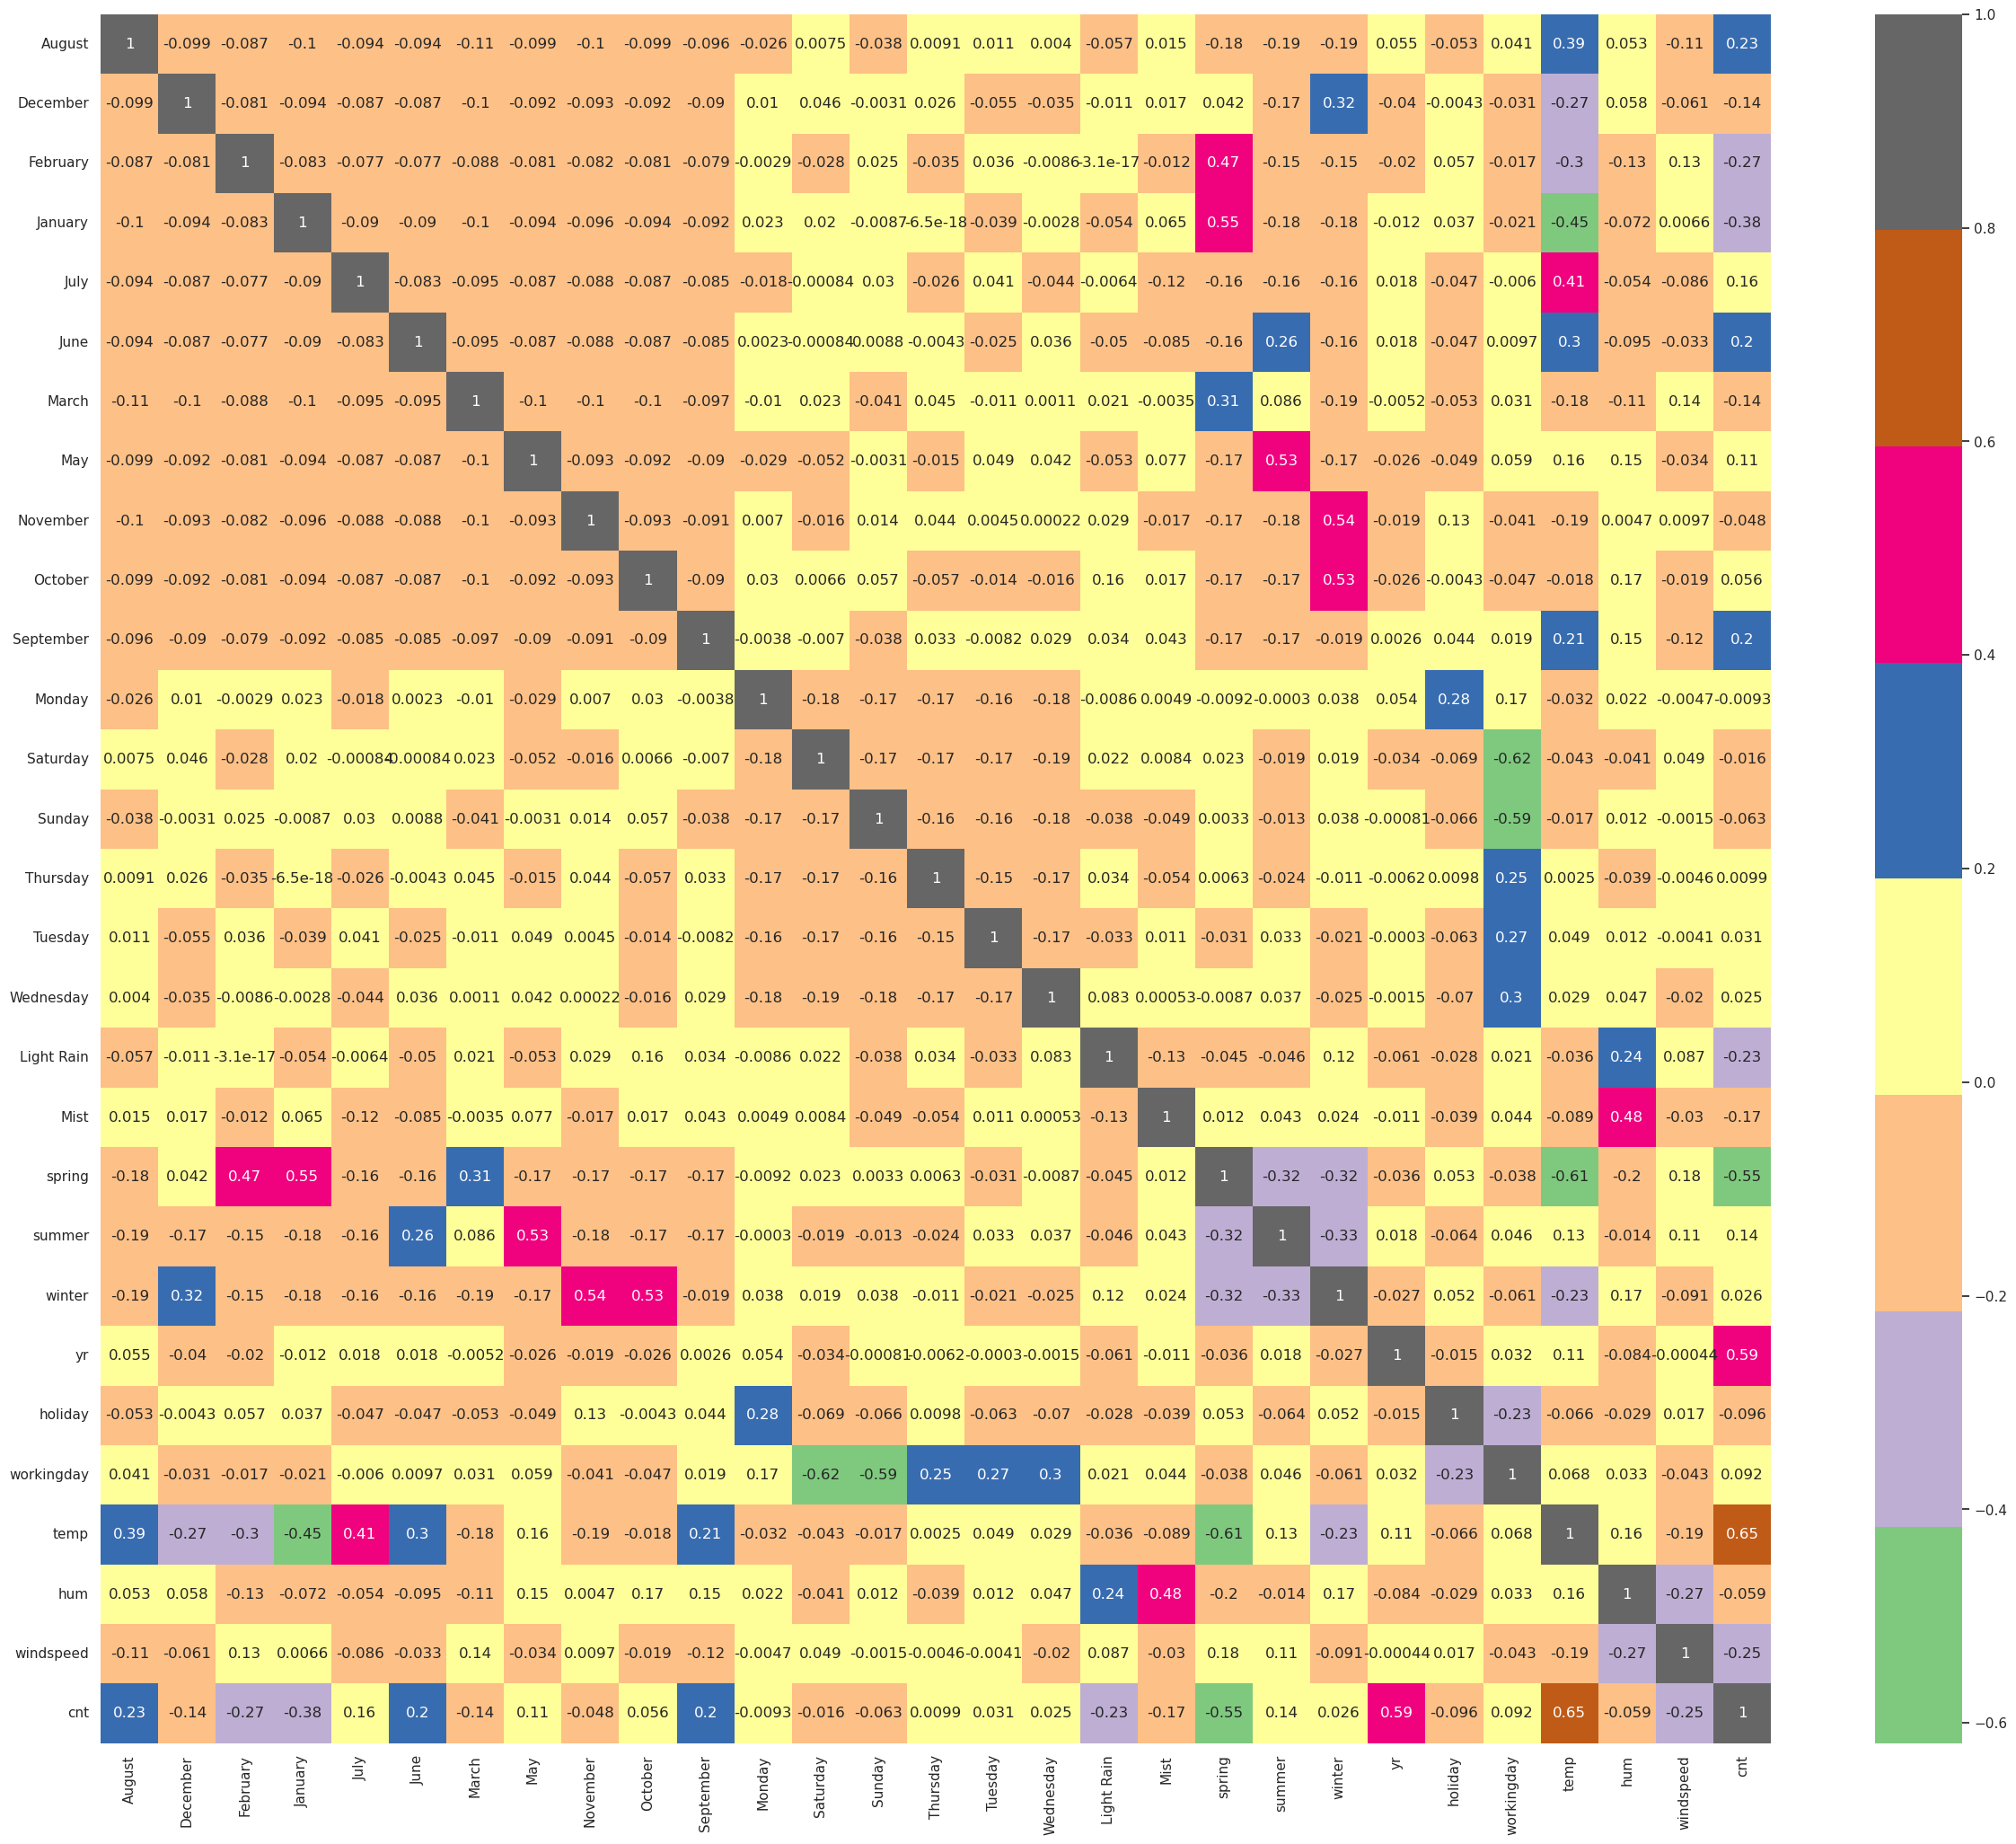

In [3512]:
# Check the correlation coefficients to see which variables are highly correlated after scaling

plt.figure(figsize=(30, 25))
sns.heatmap(bike_train.corr(),cmap='Accent',annot = True)
plt.show()

In [3513]:
#Divide into x and y
y_train = bike_train.pop('cnt')
x_train = bike_train

### Build the model

#### Recursive Feature Elimination

In [3516]:
# Import necessary library

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [3517]:
# Selecting 15 Features using RFE
lr = LinearRegression()
lr.fit(x_train, y_train)

rfe = RFE(lr, n_features_to_select=15)            
rfe = rfe.fit(x_train, y_train)

In [3518]:
# List of selected variables
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('August', False, 7),
 ('December', False, 3),
 ('February', False, 4),
 ('January', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('March', False, 14),
 ('May', False, 5),
 ('November', False, 2),
 ('October', False, 10),
 ('September', True, 1),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', False, 6),
 ('Thursday', False, 12),
 ('Tuesday', False, 9),
 ('Wednesday', False, 13),
 ('Light Rain', True, 1),
 ('Mist', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1)]

In [3519]:
# Columns where RFE support is True
col = x_train.columns[rfe.support_]
col

Index(['January', 'July', 'September', 'Saturday', 'Light Rain', 'Mist',
       'spring', 'summer', 'winter', 'yr', 'holiday', 'workingday', 'temp',
       'hum', 'windspeed'],
      dtype='object')

In [3520]:
# Columns where RFE support is False
x_train.columns[~rfe.support_]

Index(['August', 'December', 'February', 'June', 'March', 'May', 'November',
       'October', 'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [3521]:
# Create x_test dataframe with RFE selected variables
x_train_rfe = x_train[col]

In [3522]:
# Add constant variable 
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)

In [3523]:
# Check the dtypes
print(x_train_rfe.dtypes)
print(y_train.dtypes)

const         float64
January         int64
July            int64
September       int64
Saturday        int64
Light Rain      int64
Mist            int64
spring          int64
summer          int64
winter          int64
yr              int64
holiday         int64
workingday      int64
temp          float64
hum           float64
windspeed     float64
dtype: object
float64


In [3524]:
# Run the model 
lm = sm.OLS(y_train,x_train_rfe).fit()

In [3525]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          4.22e-191
Time:                        12:18:47   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -464.9517     16.159    -28.773      0.0

In [3526]:
# Drop constant term
x_train_rfe = x_train_rfe.drop(['const'], axis=1)

In [3527]:
# Calculate VIFs for new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
x = x_train_rfe
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
9           yr  83.85
13         hum  39.51
12        temp  25.43
6       spring   6.70
11  workingday   5.81
14   windspeed   5.54
8       winter   4.75
7       summer   3.51
5         Mist   2.39
3     Saturday   2.11
0      January   1.72
1         July   1.61
2    September   1.41
4   Light Rain   1.29
10     holiday   1.19

In [3528]:
# Drop January
x_train2 = x_train_rfe.drop(["January"], axis = 1)

In [3529]:
# Rebuild the model after drpping january

x_train_lm2 = sm.add_constant(x_train2)
lr1 = sm.OLS(y_train,x_train_lm2).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          2.11e-191
Time:                        12:18:48   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -463.4223     16.189    -28.626      0.0

In [3530]:
# Drop the constant term
x_train_lm2 = x_train_lm2.drop(['const'], axis=1)

In [3531]:
# Calculate the VIF for new model
vif = pd.DataFrame()
x = x_train2
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
8           yr  81.47
12         hum  39.37
11        temp  23.70
5       spring   6.61
10  workingday   5.81
13   windspeed   5.47
7       winter   4.61
6       summer   3.48
4         Mist   2.39
2     Saturday   2.11
0         July   1.61
1    September   1.41
3   Light Rain   1.29
9      holiday   1.19

In [3532]:
# Drop humidity
x_train3 = x_train_lm2.drop(["hum"], axis = 1)

In [3533]:
# Rebuild model after dropping humidity
x_train_lm3 = sm.add_constant(x_train3)
lr3 = sm.OLS(y_train,x_train_lm3).fit()
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.28e-188
Time:                        12:18:48   Log-Likelihood:                 508.20
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -471.5040     16.363    -28.815      0.0

In [3534]:
# Drop constant term
x_train_lm3=x_train_lm3.drop(['const'],axis=1)

In [3535]:
# Calculate the VIF for new model
vif = pd.DataFrame()
x = x_train3
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
8           yr  58.60
11        temp  22.32
5       spring   6.53
10  workingday   5.79
12   windspeed   5.01
7       winter   4.44
6       summer   3.45
2     Saturday   2.09
0         July   1.60
4         Mist   1.60
1    September   1.40
9      holiday   1.19
3   Light Rain   1.08

In [3536]:
# Drop holiday
x_train4=x_train_lm3.drop(['holiday'],axis=1)

In [3537]:
# Add constant 
x_train_lm4 = sm.add_constant(x_train4)
lr4 = sm.OLS(y_train,x_train_lm4).fit()
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          7.12e-189
Time:                        12:18:48   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -471.8628     16.416    -28.744      0.0

In [3538]:
# Drop constant 
x_train_lm4=x_train_lm4.drop(['const'],axis=1)

In [3539]:
# Calculate the VIF for new model
vif = pd.DataFrame()
x = x_train4
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
8           yr  57.61
10        temp  22.32
5       spring   6.53
9   workingday   5.09
11   windspeed   5.01
7       winter   4.44
6       summer   3.45
2     Saturday   1.93
0         July   1.60
4         Mist   1.60
1    September   1.40
3   Light Rain   1.08

In [3540]:
# Drop Windspeed
x_train5=x_train_lm4.drop(['windspeed'], axis=1)

In [3541]:
# Rebuild model after dropping windspeed
x_train_lm5=sm.add_constant(x_train5)
lr5=sm.OLS(y_train,x_train_lm5).fit()
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     218.1
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          1.94e-182
Time:                        12:18:48   Log-Likelihood:                 487.95
No. Observations:                 510   AIC:                            -951.9
Df Residuals:                     498   BIC:                            -901.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -469.8035     16.987    -27.657      0.0

In [3542]:
#Drop constant
x_train_lm5=x_train_lm5.drop(['const'], axis=1)

In [3543]:
# Calculate the VIF for new model
vif = pd.DataFrame()
x =x_train5
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
8           yr  53.28
10        temp  22.25
5       spring   6.49
9   workingday   5.09
7       winter   4.44
6       summer   3.41
2     Saturday   1.93
4         Mist   1.60
0         July   1.60
1    September   1.39
3   Light Rain   1.07

In [3544]:
# Drop July
x_train6=x_train_lm5.drop(['July'], axis=1)

In [3545]:
# Rebuild moel after dropping July
x_train_lm6= sm.add_constant(x_train6)
lr6=sm.OLS(y_train,x_train_lm6).fit()
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.7
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          3.10e-182
Time:                        12:18:48   Log-Likelihood:                 484.63
No. Observations:                 510   AIC:                            -947.3
Df Residuals:                     499   BIC:                            -900.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -470.8259     17.076    -27.572      0.0

In [3546]:
# Drop constant
x_train_lm7=x_train_lm6.drop(['const'],axis=1)

In [3547]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
x = x_train6
vif['Features'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
7          yr  52.63
9        temp  21.80
4      spring   6.22
8  workingday   5.09
6      winter   4.12
5      summer   2.94
1    Saturday   1.93
3        Mist   1.59
0   September   1.27
2  Light Rain   1.07

- The p-value for each predictor tests the null hypothesis that the corresponding coefficient has no effect i.e equals to zero. A low p-value (less than 0.05) suggests that the null hypothesis can be rejected, indicating that the predictor is statistically significant.

- For VIF values greater than 10 suggest high multicollinearity between predictors. Since our VIF values are all below 5, we can conclude that multicollinearity is not a concern, and we can confidently proceed with the regression analysis.

- R-squared reflects the proportion of the variance in the dependent variable that is shown by the independent variables in the model. In our case, the R-squared value is 0.826, which indicates a strong relationship between the model and the outcome.

- Adjusted R-squared accounts for the number of predictors in the model, providing a more accurate measure of fit. With an adjusted R-squared of around 0.822, our model appears to be well-fitted, even after adjusting for the number of variables included.

### Residual Analysis of the train data

In [3550]:
x_train_lm6

const  September  Saturday  Light Rain  Mist  spring  summer  winter  \
576    1.0          0         0           0     0       0       0       0   
426    1.0          0         1           0     1       1       0       0   
728    1.0          0         0           0     0       1       0       0   
482    1.0          0         1           0     1       0       1       0   
111    1.0          0         0           0     1       0       1       0   
..     ...        ...       ...         ...   ...     ...     ...     ...   
578    1.0          0         0           0     0       0       0       0   
53     1.0          0         0           0     0       1       0       0   
350    1.0          0         1           0     1       0       0       1   
79     1.0          0         0           0     1       0       1       0   
520    1.0          0         0           0     1       0       1       0   

       yr  workingday      temp  
576  2019           1  0.815169  
426  2019           0  0.442393  
728  2019           0  0.245101  
482  2019           0  0.395666  
111  2018           1  0.345824  
..    ...         ...       ...  
578  2019           1  0.863973  
53   2018           1  0.202618  
350  2018           0  0.248216  
79   2018           1  0.462664  
520  2019           1  0.600225  

[510 rows x 11 columns]

In [3551]:
# y train predicted
y_train_pred = lr6.predict(x_train_lm6)

<Figure size 640x480 with 0 Axes>

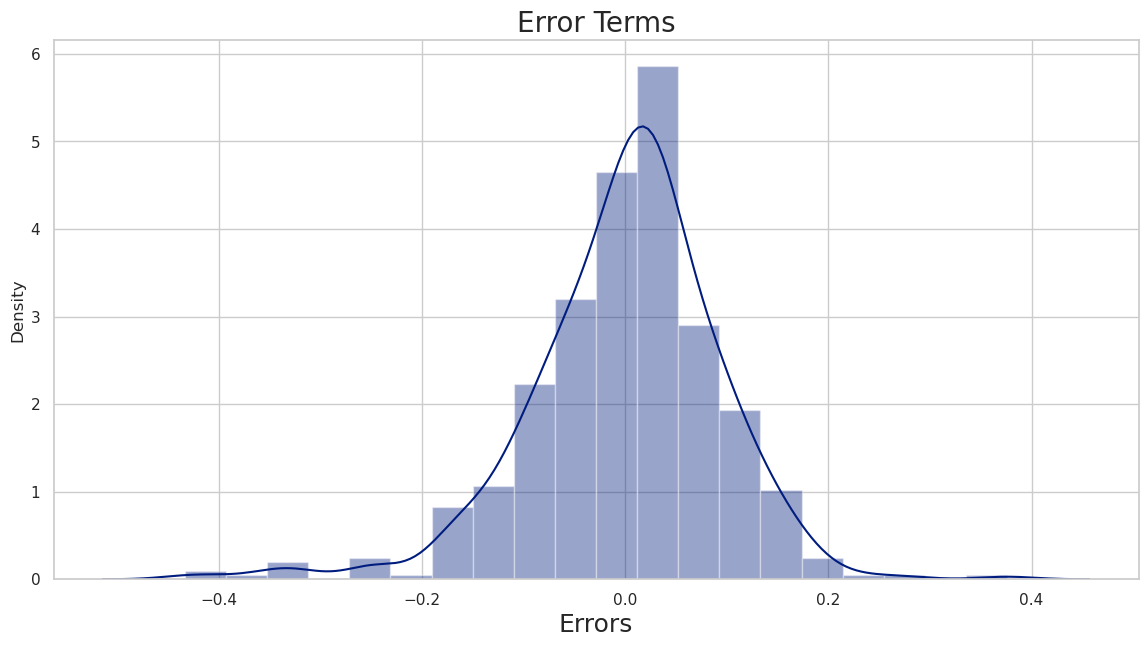

In [3552]:
# Plot histogram of error terms

fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)  
plt.show()


In [3553]:
# Check the dtypes
print(bike_test.dtypes)

August           bool
December         bool
February         bool
January          bool
July             bool
June             bool
March            bool
May              bool
November         bool
October          bool
September        bool
Monday           bool
Saturday         bool
Sunday           bool
Thursday         bool
Tuesday          bool
Wednesday        bool
Light Rain       bool
Mist             bool
spring           bool
summer           bool
winter           bool
yr              int64
holiday         int64
workingday      int64
temp          float64
hum           float64
windspeed     float64
cnt             int64
dtype: object


In [3554]:
# Convert the dtypes bool to numeric
bike_test = bike_test.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)

In [3555]:
# Create list of numeric variables
num=['temp','hum','windspeed','cnt']

#Fit on data
bike_test[num] = scaler.transform(bike_test[num])
bike_test.head()

August  December  February  January  July  June  March  May  November  \
184       0         0         0        0     1     0      0    0         0   
535       0         0         0        0     0     1      0    0         0   
299       0         0         0        0     0     0      0    0         0   
221       1         0         0        0     0     0      0    0         0   
152       0         0         0        0     0     1      0    0         0   

     October  ...  spring  summer  winter    yr  holiday  workingday  \
184        0  ...       0       0       0  2018        1           0   
535        0  ...       0       1       0  2019        0           1   
299        1  ...       0       0       1  2018        0           1   
221        0  ...       0       0       0  2018        0           1   
152        0  ...       0       1       0  2018        0           1   

         temp       hum  windspeed       cnt  
184  0.831783  0.657364   0.084219  0.692706  
535  0.901354  0.610133   0.153728  0.712034  
299  0.511964  0.837699   0.334206  0.303382  
221  0.881625  0.437098   0.339570  0.547400  
152  0.817246  0.314298   0.537414  0.569029  

[5 rows x 29 columns]

In [3556]:
# Divide into x_test and y_test
y_test = bike_test.pop('cnt')
x_test = bike_test
x_test.describe()

August    December    February     January        July        June  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.059091    0.086364    0.100000    0.077273    0.104545    0.095455   
std      0.236333    0.281541    0.300684    0.267633    0.306665    0.294512   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

            March         May    November     October  ...        Mist  \
count  220.000000  220.000000  220.000000  220.000000  ...  220.000000   
mean     0.054545    0.086364    0.072727    0.086364  ...    0.318182   
std      0.227609    0.281541    0.260281    0.281541  ...    0.466833   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.000000    0.000000    0.000000    0.000000  ...    1.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

           spring      summer      winter           yr     holiday  \
count  220.000000  220.000000  220.000000   220.000000  220.000000   
mean     0.254545    0.263636    0.236364  2018.481818    0.036364   
std      0.436599    0.441609    0.425817     0.500809    0.187620   
min      0.000000    0.000000    0.000000  2018.000000    0.000000   
25%      0.000000    0.000000    0.000000  2018.000000    0.000000   
50%      0.000000    0.000000    0.000000  2018.000000    0.000000   
75%      1.000000    1.000000    0.000000  2019.000000    0.000000   
max      1.000000    1.000000    1.000000  2019.000000    1.000000   

       workingday        temp         hum   windspeed  
count  220.000000  220.000000  220.000000  220.000000  
mean     0.700000    0.558718    0.638221    0.313293  
std      0.459303    0.233187    0.148694    0.159584  
min      0.000000    0.046591    0.261915   -0.042808  
25%      0.000000    0.355429    0.529197    0.198843  
50%      1.000000    0.558172    0.625590    0.300126  
75%      1.000000    0.755981    0.743798    0.402718  
max      1.000000    0.984424    1.002146    0.807474  

[8 rows x 28 columns]

In [3557]:
x_train6.columns

Index(['September', 'Saturday', 'Light Rain', 'Mist', 'spring', 'summer',
       'winter', 'yr', 'workingday', 'temp'],
      dtype='object')

In [3558]:
# Create x_test1 dataframe by dropping variables from x_test
x_test1 = x_test[x_train6.columns]

# Add constant
x_test1 = sm.add_constant(x_test1)
x_test1.head()

const  September  Saturday  Light Rain  Mist  spring  summer  winter  \
184    1.0          0         0           0     1       0       0       0   
535    1.0          0         0           0     0       0       1       0   
299    1.0          0         0           0     1       0       0       1   
221    1.0          0         0           0     0       0       0       0   
152    1.0          0         0           0     0       0       1       0   

       yr  workingday      temp  
184  2018           0  0.831783  
535  2019           1  0.901354  
299  2018           1  0.511964  
221  2018           1  0.881625  
152  2018           1  0.817246

In [3559]:
# y predictions
y_pred = lr6.predict(x_test1)

In [3560]:
# Evaluate R-square for test
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8115083592041703

In [3561]:
# Adjusted R square
# Foormula =1-(1-R2)*(n-1)/(n-p-1)

# n = sample size 
# p = number of independent variables

Adj=1-(1-0.8115083)*(11-1)/(11-1-1)
print(Adj)

0.7905647777777778


Text(0, 0.5, 'y_pred')

<Figure size 640x480 with 0 Axes>

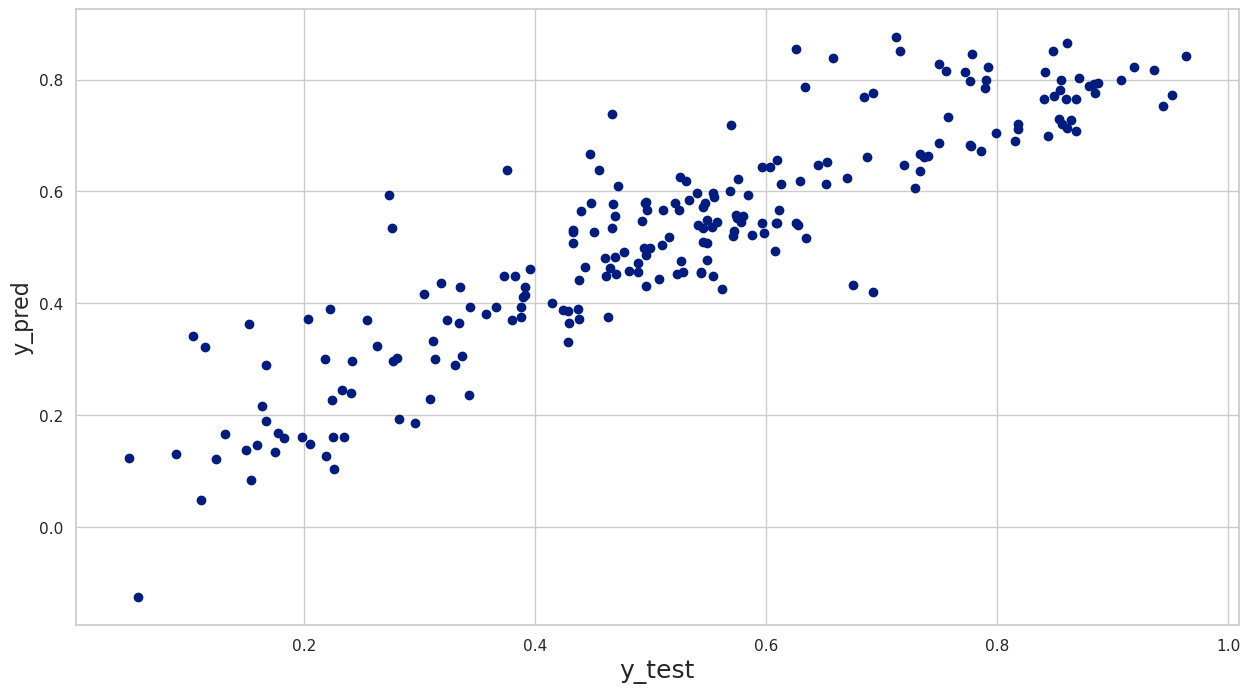

In [3562]:
# Plot y_test and y_pred
fig = plt.figure()
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                         
plt.ylabel('y_pred', fontsize=16)  

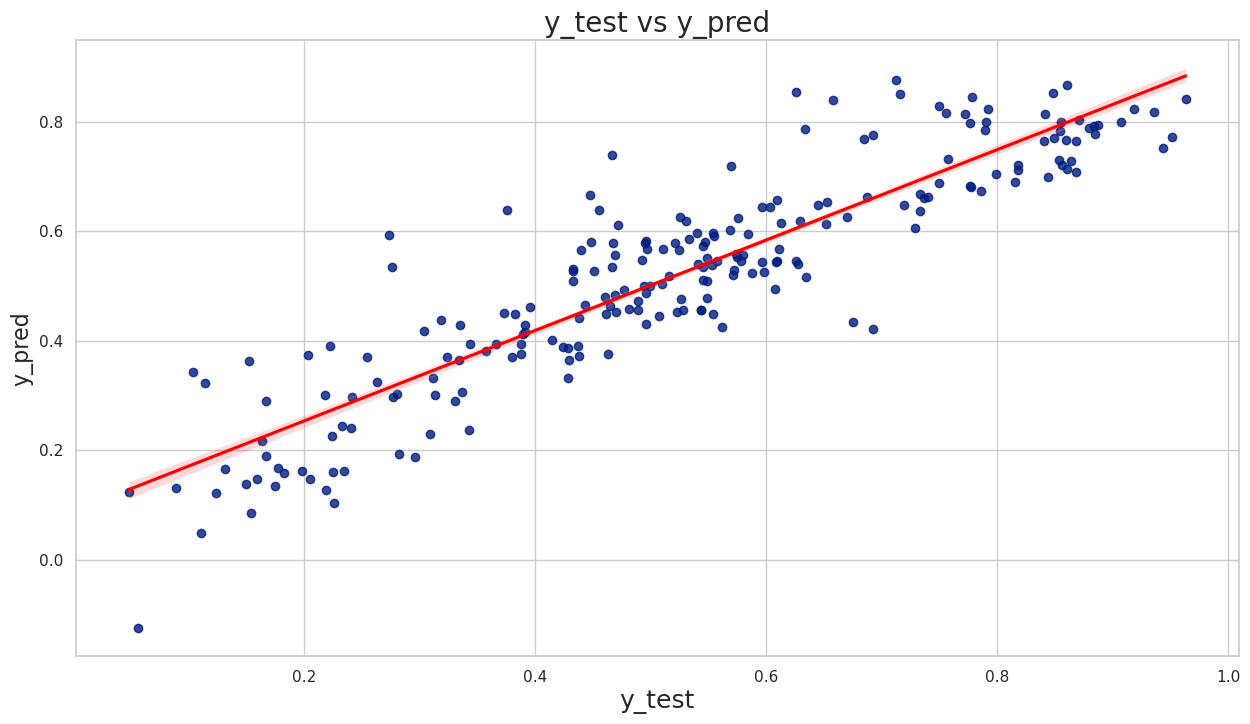

In [3563]:
# Regression plot
plt.figure(figsize=(15,8))
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                          
plt.show()

In [3564]:
# Checking the parameters of the best fit line
lr6.params.sort_values(ascending=False)

temp            0.491382
yr              0.233358
winter          0.096999
September       0.091602
Saturday        0.064533
workingday      0.056551
summer          0.052659
spring         -0.064952
Mist           -0.078644
Light Rain     -0.304122
const        -470.825866
dtype: float64

#### Equation of the Best Fitted Multiple Linear Regression Line¶

##### Comparison between train and test model

#### Observation and Inferences

In [3672]:
# Compute the correlation matrix
corr_matrix = bike_df.corr()

# Sort correlations with the target variable
correlations = corr_matrix['cnt'].sort_values(ascending=False)

# Display the top 3 features
print("Top 3 features highly correlated with demand:")
print(correlations[1:4])

Top 3 features highly correlated with demand:
temp    0.627044
yr      0.569728
June    0.195568
Name: cnt, dtype: float64


- Coefficients of other variables in the equation for best fitted line are there.
- There are some variables with negative coefficients and a  negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.
- Demand for Bike Rentals are more during working days.
- Demand for Bike Rentals are more during the Fall season and then in summer and spring but they fall behind with less margin gap can work on that part by providing any discounts or offers.
- Demand for Bike Rentals are more during Jan, Mar, Jul, May, Dec, Oct, Aug.
- Demand for Bike Rentals are more in clear weather.